# VIPERS vs GALFORM colour-magnitude

Comparison between the VIPERS colour-magnitude and the GALFORM semi-analytic simulation as obtained by Gonzalez et al. 2014. In order to make a fair comparison the transmission curves of the filters used in VIPERS and simulated in GALFORM are analysed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams.update({'font.size': 15})

In [2]:
#snapshots 41 to 44 corrispond to redshifts included in 06 - 08
#(However, in the future, it's better to use a single snapshot)
magV,magU = np.loadtxt("../data/snap_41_44_001.csv",unpack=True,delimiter=",",comments='#',usecols=[0,1],encoding = 'cp1252')

In [3]:
z_vip, U_vip,V_vip = np.loadtxt("../data/VIPERS_UV_mags.txt",unpack=True,usecols=[0,1,2],encoding = 'cp1252')

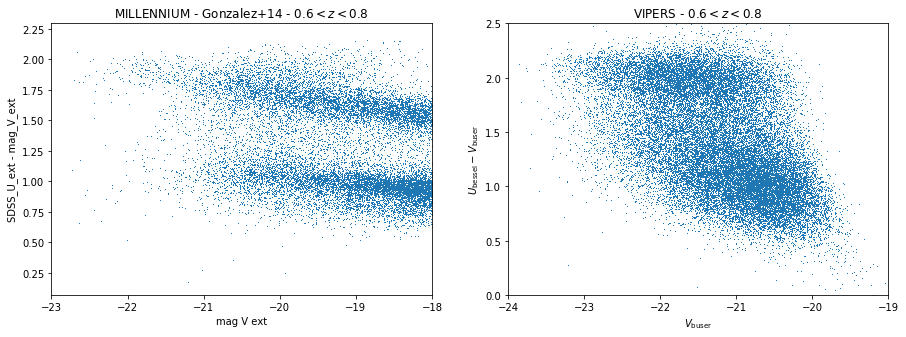

In [13]:
select_mil = np.where(magV<magV.min()+6)
select_vip = np.where((z_vip>0.6)&(z_vip<=0.8))
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)

ax1.plot(magV[select_mil],magU[select_mil]-magV[select_mil],",")
ax1.set_xlabel("mag V ext")
ax1.set_ylabel("SDSS_U_ext - mag_V_ext")
ax1.set_xlim(-23.,-18.)
ax1.set_title(r"MILLENNIUM - Gonzalez+14 - $0.6<z<0.8$")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(V_vip[select_vip],U_vip[select_vip]-V_vip[select_vip],",")
ax2.set_xlabel(r"$V_{\rm{buser}}$")
ax2.set_ylabel(r"$U_{\rm{bessel}} - V_{\rm{buser}}$")
ax2.set_ylim(0.,2.5)
ax2.set_xlim(-24,-19.)
ax2.set_title(r"VIPERS - $0.6<z<0.8$")
plt.savefig("../plots/colour_magnitude_0608.png")
plt.show()

# Transmission Curves of the filters

Transmission curves for VIPERS' filters comes directly from Marco Scodeggio. The other filters comes from:

http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php?id=SLOAN/SDSS.u&&mode=browse&gname=SLOAN&gname2=SDSS#filter

In [10]:
def integral(x,y,a,b):
    area = 0.
    red = np.where((x>=a)&(x<b))
    x_red = x[red]
    y_red = y[red]
    for i in range(len(x_red)-1):
        b = x_red[i+1]-x_red[i]
        h = y_red[i]
        area += float(b)*float(h)
    return area

In [11]:
l_ubessel,t_ubessel = np.loadtxt("../data/U_bessel.txt",unpack=True,encoding = 'cp1252')
l_usloan,t_usloan = np.loadtxt("../data/SLOAN_SDSS.u.dat",unpack=True,encoding = 'cp1252')

In [12]:
norm_ubessel = integral(l_ubessel,t_ubessel,l_ubessel.min(),l_ubessel.max())
norm_usloan = integral(l_usloan,t_usloan,l_usloan.min(),l_usloan.max())
print norm_ubessel
print norm_usloan
t_ubessel_norm = t_ubessel/norm_ubessel
t_usloan_norm = t_usloan/norm_usloan

289.1847
60.5825


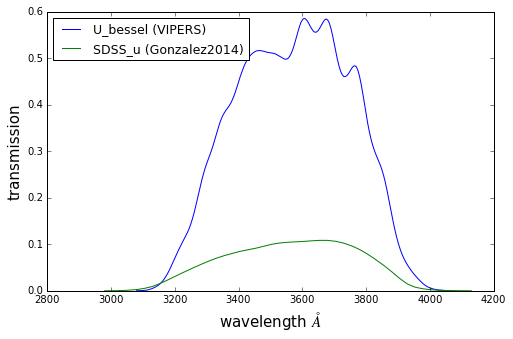

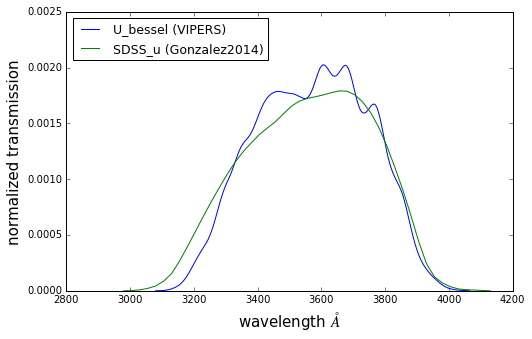

In [13]:
#Comparison of the transmission of the U filters used in VIPERS and Gonzalez+14

#transmission
plt.figure(figsize=(8,5))
plt.plot(l_ubessel,t_ubessel,label="U_bessel (VIPERS)")
plt.plot(l_usloan,t_usloan,label="SDSS_u (Gonzalez2014)")
plt.legend(fontsize="small",loc=2)
plt.xlabel(r"wavelength $\AA$")
plt.ylabel("transmission")
plt.savefig("../plots/U_transmission_curve.png")
plt.show()

#normalized transmission
plt.figure(figsize=(8,5))
plt.plot(l_ubessel,t_ubessel_norm,label="U_bessel (VIPERS)")
plt.plot(l_usloan,t_usloan_norm,label="SDSS_u (Gonzalez2014)")
plt.legend(fontsize="small",loc=2)
plt.xlabel(r"wavelength $\AA$")
plt.ylabel("normalized transmission")
plt.savefig("../plots/U_transmission_curve_norm.png")
plt.show()

In [14]:
l_vbuser,t_vbuser = np.loadtxt("../data/V_buser.txt",unpack=True,encoding='cp1252')
l_vjohnson,t_vjohnson = np.loadtxt("../data/Generic_Johnson.V.dat",unpack=True,encoding='cp1252')

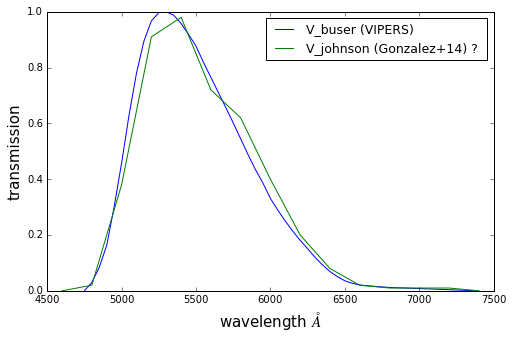

In [23]:
# V filters, without normalizing they look similar (Not sure if GALFORM uses V_JOHNSON)
plt.figure(figsize=(8,5))
plt.plot(l_vbuser,t_vbuser,label="V_buser (VIPERS)")
plt.plot(l_vjohnson,t_vjohnson,label="V_johnson (Gonzalez+14) ? ")
plt.legend(fontsize="small",loc=1)
plt.xlabel(r"wavelength $\AA$")
plt.ylabel("transmission")
plt.savefig("../plots/V_transmission_curve.png")
plt.show()

# Interactive queries to the Virgo Database

In [4]:
from virgodb import VirgoDB
vdb = VirgoDB("giorgio",password="BN401kmd")

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 

In [5]:
snaps = vdb.execute_query("select * from snapshots..mr7")

In [6]:
#Let's choose interesting snapshots to look at
snapnum = snaps["snapnum"]
redshift = snaps["z"]
interesting_snaps = np.where((redshift>0.5)&(redshift<0.9))

for i in range(len(snapnum[interesting_snaps])):
    print snapnum[interesting_snaps][i],redshift[interesting_snaps][i]

41 0.827699
42 0.755036
43 0.687109
44 0.62359
45 0.564177
46 0.508591


I have chosen the snapshot number 42 i.e $z\approx 0.75$

In [102]:
#snapshot at redshift 0.75
data = vdb.execute_query("SELECT mag_V_ext,SDSS_u_ext,SDSS_i_obs_ext,stellarmass,type,mdhalo FROM Gonzalez2014a..MR7 WHERE Snapnum=42 and random<0.01")




In [10]:
data.dtype.fields.keys()

[u'stellarmass', u'SDSS_u_ext', u'SDSS_i_obs_ext', u'type', u'mag_V_ext']

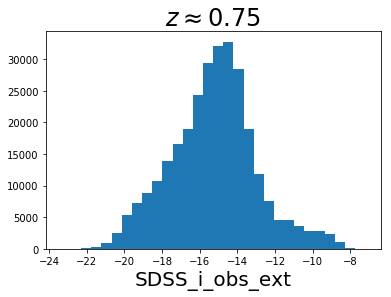

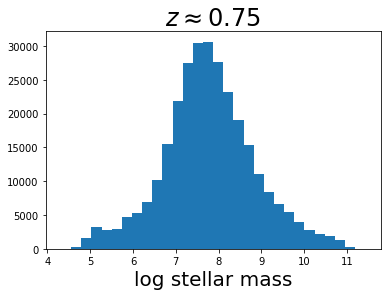

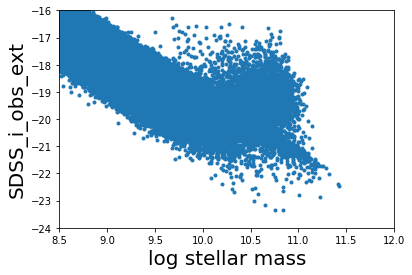

In [108]:
#data for the following colour-magnitude

i_gal_obs = data['SDSS_i_obs_ext']
mass = np.log10(data['stellarmass']*10**10)

u_gal = data['SDSS_u_ext']
v_gal = data['mag_V_ext']

type_gal = data['type']
mdhalo = data['mdhalo']

#since z~0.75 ==> D_L ~3000 Mpc ==> i =22.5 <==> I ~ -19
u_gal = u_gal[np.where(i_gal_obs<-19.)] 
v_gal = v_gal[np.where(i_gal_obs<-19.)]
type_gal = type_gal[np.where(i_gal_obs<-19.)]
mdhalo = mdhalo[np.where(i_gal_obs<-19.)]

#i_gal = i_gal_obs[np.where(i_gal_obs<-19.)]

uv_gal = u_gal-v_gal

plt.hist(i_gal_obs,bins=30)
plt.xlabel("SDSS_i_obs_ext")
plt.title(r"$z\approx 0.75$")
plt.savefig('../plots/i_distribution_galform.png')
plt.show()

plt.hist(mass,bins=30)
plt.title(r"$z\approx 0.75$")
plt.xlabel(r"log stellar mass")
plt.savefig('../plots/mass_distribution_galform.png')
plt.show()


plt.plot(mass,i_gal_obs,".")
plt.xlim(8.5,12)
plt.ylim(-24,-16)
plt.xlabel("log stellar mass")
plt.ylabel('SDSS_i_obs_ext')
plt.savefig('../plots/Mass_Imag_relation.png')
plt.show()

u_vipers = U_vip[np.where((z_vip>0.7)&(z_vip<=0.8))]
v_vipers = V_vip[np.where((z_vip>0.7)&(z_vip<=0.8))]
uv_vipers = u_vipers-v_vipers

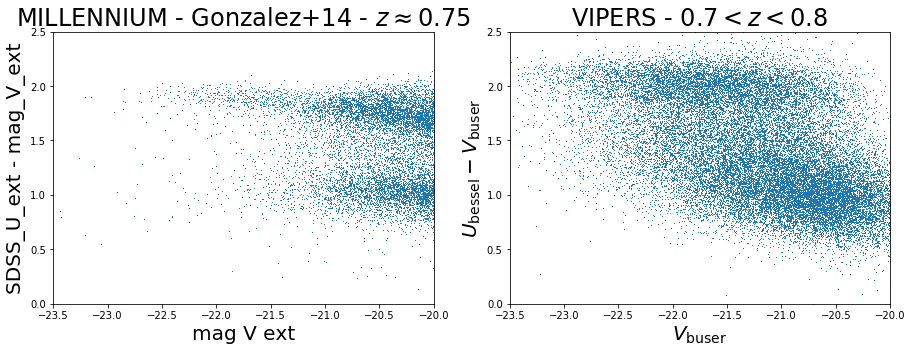

In [63]:
def double_plot(x1,y1,x2,y2,xlab1,ylab1,xlab2,ylab2,xlim1,ylim1,xlim2,ylim2,tit1,tit2,save):
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(1,2,1)

    #a = ax1.scatter(x1,y1,c=type_gal,s=1)
    ax1.plot(x1,y1,',')
    #ax1.scatter(x1,y1,c=type_gal,s=1)
    ax1.set_xlabel(xlab1)
    ax1.set_ylabel(ylab1)
    ax1.set_xlim(xlim1)
    ax1.set_ylim(ylim1)
    ax1.set_title(tit1)


    #fig.colorbar(a,fraction=.1,orientation='vertical',label='type')
    #ax.colorbar(im, fraction=0.046, pad=0.04)


    
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(V_vip[select_vip],U_vip[select_vip]-V_vip[select_vip],",")
    ax2.set_xlabel(xlab2)
    ax2.set_ylabel(ylab2)
    ax2.set_ylim(ylim2)
    ax2.set_xlim(xlim2)
    ax2.set_title(tit2)
    
    
    
    plt.savefig(save)
    plt.show()

matplotlib.rcParams.update({'font.size': 20})
double_plot(v_gal,uv_gal,v_vipers,uv_vipers,
            "mag V ext","SDSS_U_ext - mag_V_ext",
            r"$V_{\rm{buser}}$",r"$U_{\rm{bessel}} - V_{\rm{buser}}$",
            (-23.5,-20.),(0,2.5),(-23.5,-20.),(0.,2.5),
            r"MILLENNIUM - Gonzalez+14 - $z \approx 0.75$",r"VIPERS - $0.7<z<0.8$",
            "../plots/003/colour_magnitude_0708_.png")

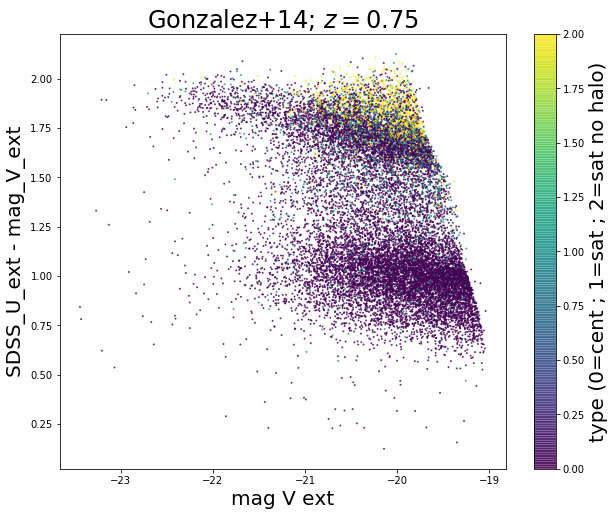

In [109]:
plt.figure(figsize=(10,8))
plt.scatter(v_gal,uv_gal,c=type_gal,s=1,alpha=0.7)
plt.xlabel("mag V ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.colorbar(label='type (0=cent ; 1=sat ; 2=sat no halo)')
plt.title('Gonzalez+14; $z = 0.75$')
#plt.savefig("../plots/003/colour_magnitude_075_satellites.png")
plt.show()

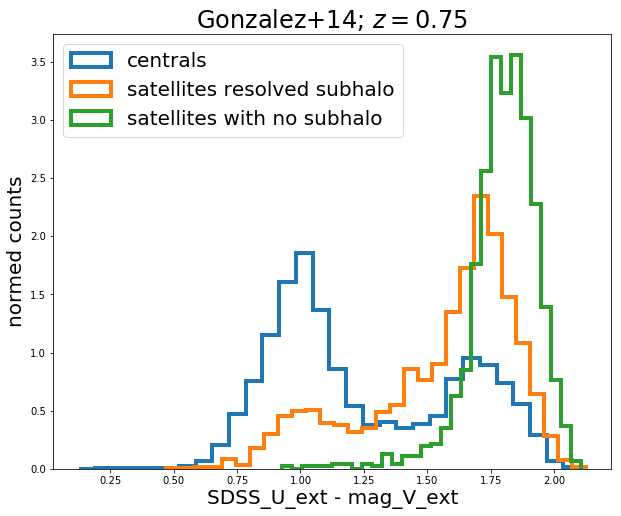

In [97]:
plt.figure(figsize=(10,8))
plt.hist(uv_gal[type_gal==0],bins=30,normed=True,histtype='step',lw=4,label='centrals')
plt.hist(uv_gal[type_gal==1],bins=30,normed=True,histtype='step',lw=4,label='satellites resolved subhalo')
plt.hist(uv_gal[type_gal==2],bins=30,normed=True,histtype='step',lw=4,label='satellites with no subhalo')
plt.xlabel("SDSS_U_ext - mag_V_ext")
plt.ylabel('normed counts')
plt.title('Gonzalez+14; $z = 0.75$')
plt.legend(loc=2)
plt.savefig("../plots/003/hist_colour_075_satellites_norm.png")
plt.show()

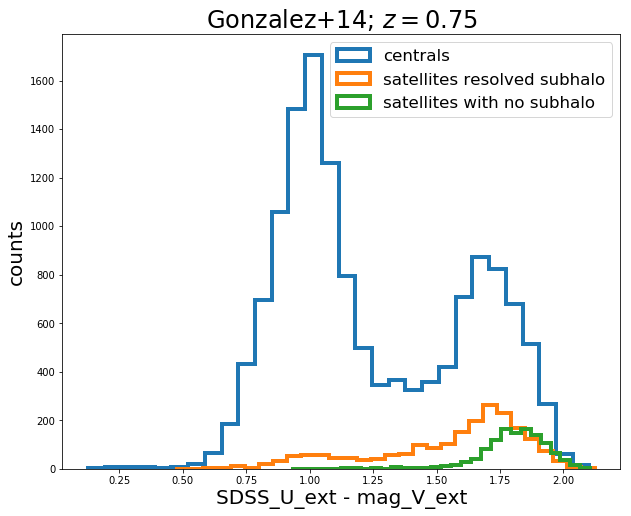

In [98]:
plt.figure(figsize=(10,8))
plt.hist(uv_gal[type_gal==0],bins=30,normed=False,histtype='step',lw=4,label='centrals')
plt.hist(uv_gal[type_gal==1],bins=30,normed=False,histtype='step',lw=4,label='satellites resolved subhalo')
plt.hist(uv_gal[type_gal==2],bins=30,normed=False,histtype='step',lw=4,label='satellites with no subhalo')
plt.xlabel("SDSS_U_ext - mag_V_ext")
plt.ylabel('counts')
plt.legend(loc=1,fontsize='small')
plt.title('Gonzalez+14; $z = 0.75$')
plt.savefig("../plots/003/hist_colour_075_satellites.png")
plt.show()

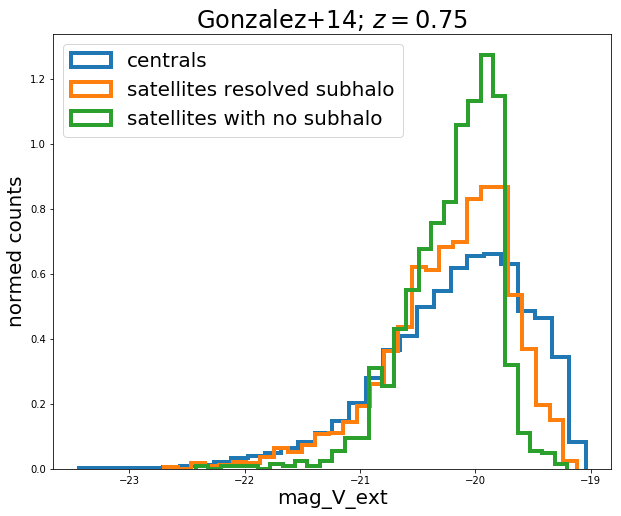

In [99]:
plt.figure(figsize=(10,8))
plt.hist(v_gal[type_gal==0],bins=30,normed=True,histtype='step',lw=4,label='centrals')
plt.hist(v_gal[type_gal==1],bins=30,normed=True,histtype='step',lw=4,label='satellites resolved subhalo')
plt.hist(v_gal[type_gal==2],bins=30,normed=True,histtype='step',lw=4,label='satellites with no subhalo')
plt.xlabel("mag_V_ext")
plt.ylabel('normed counts')
plt.legend(loc=2)
plt.title('Gonzalez+14; $z = 0.75$')
plt.savefig("../plots/003/hist_mag_075_satellites_norm.png")
plt.show()

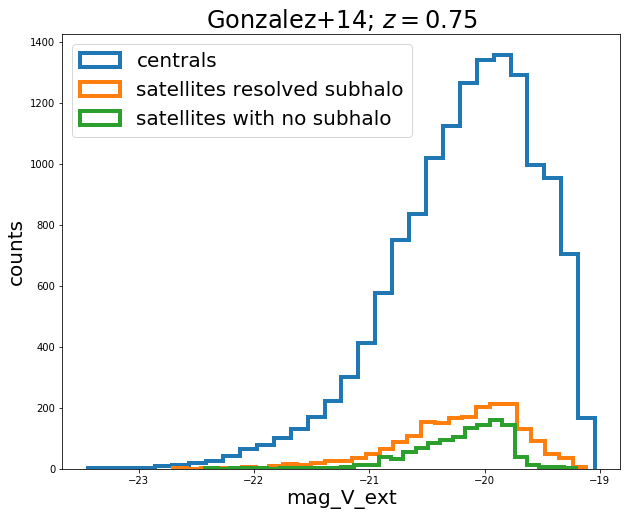

In [101]:
plt.figure(figsize=(10,8))
plt.hist(v_gal[type_gal==0],bins=30,normed=False,histtype='step',lw=4,label='centrals')
plt.hist(v_gal[type_gal==1],bins=30,normed=False,histtype='step',lw=4,label='satellites resolved subhalo')
plt.hist(v_gal[type_gal==2],bins=30,normed=False,histtype='step',lw=4,label='satellites with no subhalo')
plt.xlabel("mag_V_ext")
plt.ylabel('counts')
plt.legend(loc=2)
plt.title('Gonzalez+14; $z = 0.75$')

plt.savefig("../plots/003/hist_mag_075_satellites.png")
plt.show()

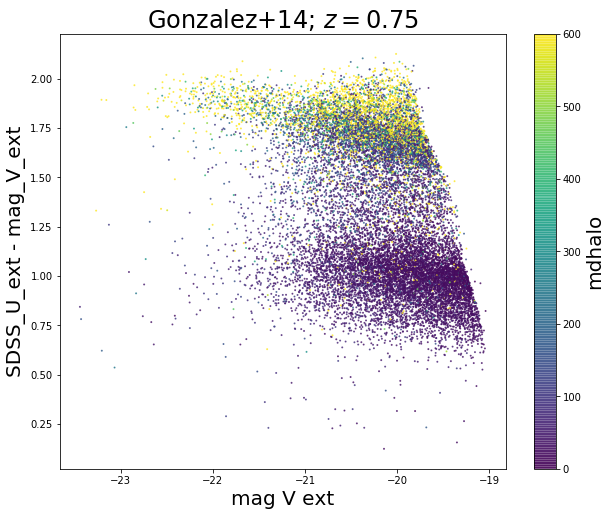

In [129]:
plt.figure(figsize=(10,8))
plt.scatter(v_gal,uv_gal,c=mdhalo,s=1,alpha=0.7,vmin=0,vmax=600.)
plt.xlabel("mag V ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.colorbar(label='mdhalo')
plt.title('Gonzalez+14; $z = 0.75$')
plt.savefig("../plots/003/colour_magnitude_075_mdhalo.png")
plt.show()

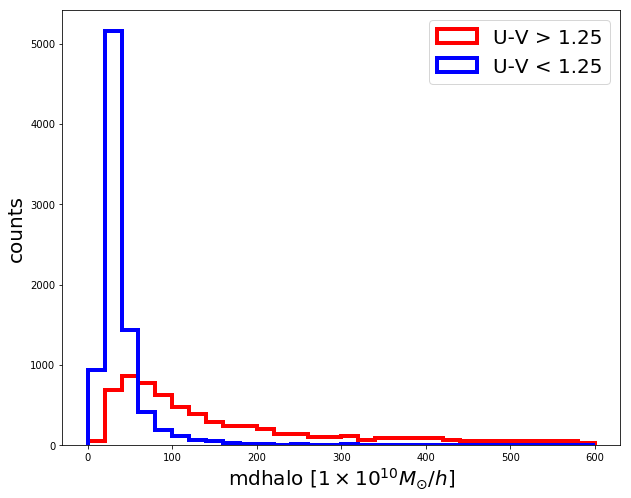

In [128]:
plt.figure(figsize=(10,8))
plt.hist(mdhalo[np.where(uv_gal>1.25)],bins=30,range=(0,600),histtype='step',lw=4,label='U-V > 1.25',color='r')
plt.hist(mdhalo[np.where(uv_gal<1.25)],bins=30,range=(0,600),histtype='step',lw=4,label='U-V < 1.25',color='b')
plt.xlabel(r'mdhalo [$1\times10^{10}M_{\odot}/h$]')
plt.ylabel('counts')
plt.legend()
plt.savefig("../plots/003/hist_mdhalo_075_red_blue.png")
plt.show()

# PAUS - COSMO experiments

In [45]:
import pandas as pd

In [46]:
data = pd.read_csv("../cosmo_paus_manual_match.csv")
print data.columns.values
z_phot = data["zb"]
z_spec = data["zspec"]
u = data['umag']
v = data['vmag']
ra = data['ra']
dec = data['dec']

['ref_id' 'zb' 'odds' 'pz_width' 'zb_mean' 'chi2' 'n_band' 'ebv'
 'production_id' 'paudm_id' 'ra' 'dec' 'zp_gal' 'zl68_gal' 'zu68_gal'
 'zl99_gal' 'zu99_gal' 'zp_sec' 'dchi' 'imag' 'ei' 'i_auto' 'nbfilt'
 'mod_gal' 'type' 'umag' 'bmag' 'vmag' 'gmag' 'rmag' 'zmag' 'icmag' 'jmag'
 'kmag' 'mv' 'ebv_gal' 'ebv_int' 'acs_a_image' 'acs_b_image'
 'acs_theta_image' 'acs_mag_auto' 'acs_magerr_auto' 'zspec' 'conf' 'f814w'
 'zfits' 'r50' 'sersic_n_gim2d']


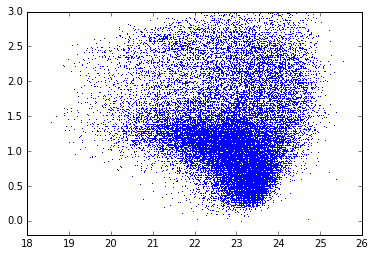

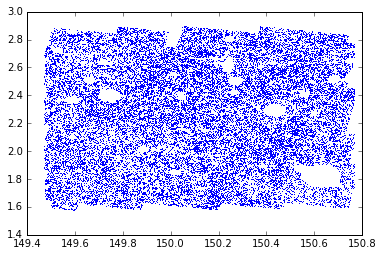

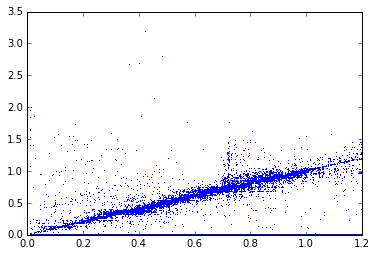

In [47]:
plt.plot(v,u-v,",")
plt.ylim(-0.2,3)

plt.show()

plt.plot(ra,dec,",")
plt.show()


plt.plot(z_phot,z_spec,",")
plt.show()